**Note:** This notebook can run using TensorFlow 2.5.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
import csv
import pandas as pd
import random
import numpy as np
from keras import regularizers
import re
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import nltk
nltk.download('wordnet')
import itertools
from string import ascii_lowercase
from functools import reduce
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
print(imdb)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOQTJUJ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOQTJUJ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOQTJUJ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, 'unsupervised': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [5]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [24]:
print(testing_sentences[:5])
print(testing_labels[:5])
print(training_sentences[:5])
print(training_labels_final[:5])

["There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", "A blackly comic tale of a down-trodden priest, Nazarin 

In [7]:
print(len(testing_sentences))
print(len(training_sentences))

25000
25000


In [8]:
##Lemmatization
from nltk import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer= WordNetLemmatizer()
def lemma(text, lemmatization=True):
  output=''
  if lemmatization:
    text=text.split(' ')
    for word in text:
      word1 = lemmatizer.lemmatize(word, pos = "n") #noun 
      word2 = lemmatizer.lemmatize(word1, pos = "v") #verb
      word3 = lemmatizer.lemmatize(word2, pos = "a") #adjective
      word4 = lemmatizer.lemmatize(word3, pos = "r") #adverb
      output=output + " " + word4
  else:
    output=text
  
  return str(output.strip())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
lema_test_text=[]
for line in testing_sentences:
    lema_test_text.append(lemma(line))
lema_train_text=[]
for line in training_sentences:
    lema_train_text.append(lemma(line))

In [10]:
##Stopwords Removal
from tqdm import tqdm_notebook
import itertools
from string import ascii_lowercase

stopword_list=[]
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_lowercase, repeat=size):
            yield "".join(s)

dual_alpha_list=[]
for s in iter_all_strings():
    dual_alpha_list.append(s)
    if s == 'zz':
        break

dual_alpha_list.remove('i')
dual_alpha_list.remove('a')
dual_alpha_list.remove('am')
dual_alpha_list.remove('an')
dual_alpha_list.remove('as')
dual_alpha_list.remove('at')
dual_alpha_list.remove('be')
dual_alpha_list.remove('by')
dual_alpha_list.remove('do')
dual_alpha_list.remove('go')
dual_alpha_list.remove('he')
dual_alpha_list.remove('hi')
dual_alpha_list.remove('if')
dual_alpha_list.remove('is')
dual_alpha_list.remove('in')
dual_alpha_list.remove('me')
dual_alpha_list.remove('my')
dual_alpha_list.remove('no')
dual_alpha_list.remove('of')
dual_alpha_list.remove('on')
dual_alpha_list.remove('or')
dual_alpha_list.remove('ok')
dual_alpha_list.remove('so')
dual_alpha_list.remove('to')
dual_alpha_list.remove('up')
dual_alpha_list.remove('us')
dual_alpha_list.remove('we')


for letter in dual_alpha_list:
    stopword_list.append(letter)

In [11]:
print(stopword_list)
print(len(stopword_list))
print(len(lema_train_text))

['b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'ao', 'ap', 'aq', 'ar', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'ba', 'bb', 'bc', 'bd', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq', 'br', 'bs', 'bt', 'bu', 'bv', 'bw', 'bx', 'bz', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'dp', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq', 'fr', 'fs', 'ft', 'fu', 'fv', 'fw', 'fx

In [12]:
def remove_stopwords(text, remove_stop=True):
  output = ""
  if remove_stop:
    text=text.split(" ")
    for word in text:
      if word not in stopword_list:
        output=output + " " + word
  else :
    output=text

  return str(output.strip())

#Removing Stopwords from Train Data
processed_train_data = [] 
for line in tqdm_notebook(lema_train_text, total=25000): 
    processed_train_data.append(remove_stopwords(line))
#Removing Stopwords from Test Data
processed_test_data = [] 
for line in tqdm_notebook(lema_test_text, total=25000): 
    processed_test_data.append(remove_stopwords(line))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/25000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/25000 [00:00<?, ?it/s]

In [13]:
#Checking the max length of a sentence available in the dataset
count=0
max=0
for i in training_sentences:
  count=len(i)
  if count>max:
    max=0
    max=count
  count=0
print(max)

13704


In [14]:
max_features=82930
maxpadlen = 300          
val_split = 0.2      
embedding_dim_fasttext = 300

In [15]:
processed_data=processed_train_data+processed_test_data

In [20]:
print(len(processed_data))
labels=training_labels+testing_labels
label_final = np.array(labels)
print(len(label_final))

50000
50000


In [25]:
print(processed_data[:5])
print(label_final[:5])

["This an absolutely terrible movie. Don't be lure in by Christopher Walken or Michael Ironside. Both be great actors, but this must simply be their bad role in history. Even their great act could not redeem this movie's ridiculous storyline. This movie be an early ninety US propaganda piece. The most pathetic scene be those when the Columbian rebel be make their case for revolutions. Maria Conchita Alonso appear phony, and her pseudo-love affair with Walken nothing but a pathetic emotional plug in a movie that devoid of any real meaning. I be disappoint that there be movie like this, ruin actor's like Christopher Walken's good name. I could barely sit through it.", 'I have be know to fall asleep during films, but this be usually due to a combination of thing including, really tired, be warm and comfortable on the sette and have just eat a lot. However on this occasion I fell asleep because the film rubbish. The plot development constant. Constantly slow and boring. Things seem to happ

In [26]:
#Tokenization
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(processed_data))
list_tokenized = tokenizer.texts_to_sequences(processed_data)

In [27]:
#Indexing
word_index=tokenizer.word_index
print(len(word_index))
print(word_index)

118090
{'the': 1, 'a': 2, 'be': 3, 'and': 4, 'of': 5, 'to': 6, 'br': 7, 'in': 8, 'i': 9, 'this': 10, 'that': 11, 'movie': 12, 'film': 13, 'for': 14, 'with': 15, 'but': 16, 'have': 17, 'on': 18, 'not': 19, 'you': 20, 'his': 21, 'one': 22, 'he': 23, 'it': 24, 'all': 25, 'at': 26, 'by': 27, 'like': 28, 'an': 29, 'make': 30, 'they': 31, 'so': 32, 'who': 33, 'from': 34, 'good': 35, 'see': 36, 'do': 37, 'or': 38, 'just': 39, 'her': 40, 'get': 41, 'out': 42, 'about': 43, 'if': 44, "it's": 45, 'there': 46, 'some': 47, 'what': 48, 'time': 49, 'when': 50, 'more': 51, 'very': 52, 'up': 53, 'watch': 54, 'go': 55, 'no': 56, 'even': 57, 'my': 58, 'bad': 59, 'story': 60, 'would': 61, 'she': 62, 'character': 63, 'think': 64, 'which': 65, 'only': 66, 'really': 67, 'their': 68, 'can': 69, 'me': 70, 'well': 71, 'show': 72, 'great': 73, 'than': 74, 'much': 75, 'we': 76, 'look': 77, 'will': 78, 'scene': 79, 'know': 80, 'other': 81, 'also': 82, 'people': 83, 'into': 84, 'because': 85, 'how': 86, 'first': 87

In [28]:
#padding
padded=pad_sequences(list_tokenized, maxlen=maxpadlen, padding = 'post')

In [30]:
#Splitting data into Training and Validation Set

x_train, x_val, y_train, y_val = train_test_split(padded, label_final, test_size=0.2, random_state=2)

In [32]:
embeddings_index_fasttext = {}
f = open('/content/drive/MyDrive/IMP STUFF/Toxicity Project/wiki-news-300d-1M.vec', encoding='utf8')
for line in f:
    line.encode('utf-8').strip()
    values = line.split()
    word = values[0]
    embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')
f.close()
embedding_matrix_fasttext = np.random.random((len(word_index) + 1, embedding_dim_fasttext))
for word, i in word_index.items():
    embedding_vector = embeddings_index_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector

In [39]:
model_1 = tf.keras.Sequential([
	tf.keras.layers.Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings'),
  tf.keras.layers.Input(shape=(maxpadlen, ),dtype='int32'),
  tf.keras.layers.LSTM(40,return_sequences=True, name='lstm_layer'),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dropout(.1),
	tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddings (Embedding)      (None, 300, 300)          35427300  
                                                                 
 input_3 (InputLayer)        multiple                  0         
                                                                 
 lstm_layer (LSTM)           (None, 300, 40)           54560     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 40)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 30)                1230      
                                                      

In [40]:
history_1 = model_1.fit(x_train,y_train, epochs=10, batch_size=32,  validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 82s 64ms/step - loss: 0.4231 - accuracy: 0.7984 - val_loss: 0.3036 - val_accuracy: 0.8717
Epoch 2/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.3169 - accuracy: 0.8677 - val_loss: 0.2775 - val_accuracy: 0.8832
Epoch 3/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.2799 - accuracy: 0.8834 - val_loss: 0.2681 - val_accuracy: 0.8858
Epoch 4/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.2565 - accuracy: 0.8956 - val_loss: 0.2355 - val_accuracy: 0.9045
Epoch 5/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.2387 - accuracy: 0.9019 - val_loss: 0.2325 - val_accuracy: 0.9044
Epoch 6/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.2183 - accuracy: 0.9127 - val_loss: 0.2234 - val_accuracy: 0.9095
Epoch 7/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.2054 - accuracy: 0.9180 - val_loss: 0.2302 -

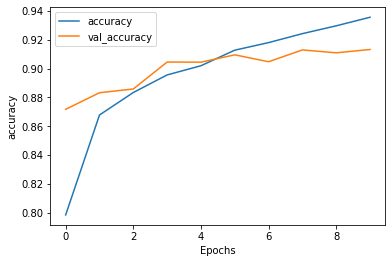

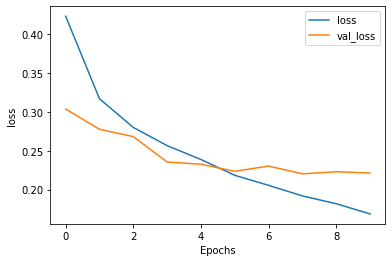

In [41]:
def plot_graphs(history_1, string):
  plt.plot(history_1.history[string])
  plt.plot(history_1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_1, 'accuracy')
plot_graphs(history_1, 'loss')

In [42]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    print('hi',text)
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
    
print(decode_review(padded[3]))
print(training_sentences[3])

hi [   10     3     1   228     5    13    14     2  8326  2576  2529    50
     1   369     5     1   180    69    55  1378    15   191   928     2
    20  4630    84     2   158  1404  2543     4 14183    14     2   353
     5  1709   402   163    34  8244     4  5585  2115   148   215  8094
  2697     1   111   346    46     3    56  5623     6  1158    56  1640
  4337    39     2  1726     4  1759 20147   138   160   855   107    26
   116     2   226    13     8   167   280     4    22    11   568     1
  1762  7644     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0

In [43]:
e = model_1.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(118091, 300)


In [44]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_features):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [45]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
model_2= tf.keras.Sequential([
	tf.keras.layers.Embedding(max_features, 16, input_length=maxpadlen),             
  tf.keras.layers.LSTM(40,return_sequences=True, name='lstm_layer'),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dropout(.1),
	tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 16)           1326880   
                                                                 
 lstm_layer (LSTM)           (None, 300, 40)           9120      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 40)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 30)                1230      
                                                                 
 dropout_9 (Dropout)         (None, 30)                0         
                                                      

In [54]:
history_2= model_2.fit(x_train,y_train, epochs=5, batch_size=32,  validation_data=(x_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 85s 67ms/step - loss: 0.3757 - accuracy: 0.8271 - val_loss: 0.2567 - val_accuracy: 0.8949
Epoch 2/5
1250/1250 [==============================] - 82s 66ms/step - loss: 0.1893 - accuracy: 0.9312 - val_loss: 0.2439 - val_accuracy: 0.9008
Epoch 3/5
1250/1250 [==============================] - 82s 65ms/step - loss: 0.1146 - accuracy: 0.9619 - val_loss: 0.2841 - val_accuracy: 0.8955
Epoch 4/5
1250/1250 [==============================] - 82s 66ms/step - loss: 0.0763 - accuracy: 0.9746 - val_loss: 0.3337 - val_accuracy: 0.8819
Epoch 5/5
1250/1250 [==============================] - 82s 66ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.4210 - val_accuracy: 0.8823


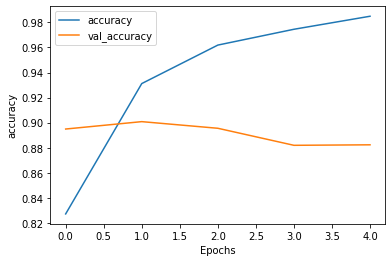

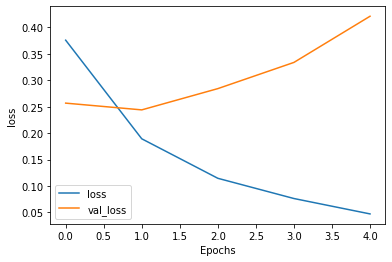

In [58]:
def plot_graphs(history_2, string):
  plt.plot(history_2.history[string])
  plt.plot(history_2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_2, 'accuracy')
plot_graphs(history_2, 'loss')

In [55]:
e = model_2.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(82930, 16)


In [56]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_features):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [57]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>